In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import SGD, Adam
#from keras_visualizer import visualizer 
import tensorflow as tf
import pandas as pd

In [ ]:
df = pd.read_csv("income_dataset.csv",)

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
(df["income"].value_counts())

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [ ]:
df["workclass"].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [ ]:
df["fnlwgt"].value_counts()

164190    13
203488    13
123011    13
113364    12
121124    12
          ..
183522     1
44419      1
442612     1
374833     1
257302     1
Name: fnlwgt, Length: 21648, dtype: int64

In [ ]:
df["education"].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [ ]:
df["education.num"].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education.num, dtype: int64

### education.num is representative of education. So we can drop this correlated feature from our dataframe

In [ ]:
df["occupation"].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [ ]:
df["relationship"].value_counts().keys()

Index(['Husband', 'Not-in-family', 'Own-child', 'Unmarried', 'Wife',
       'Other-relative'],
      dtype='object')

In [ ]:
df["race"].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [ ]:
df["sex"].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

In [ ]:
df["capital.gain"].value_counts().keys()

Int64Index([    0, 15024,  7688,  7298, 99999,  5178,  3103,  4386,  5013,
             8614,
            ...
            22040,  1455,  6097,  1639,  2387,  1111,  4931,  7978,  5060,
             2538],
           dtype='int64', length=119)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df["capital.loss"].value_counts().keys()

Int64Index([   0, 1902, 1977, 1887, 1485, 1848, 2415, 1602, 1740, 1590, 1876,
            1672, 2258, 1564, 1741, 2001, 1669, 1980, 1719, 1408, 2002, 2051,
            2377, 1579, 1721, 1974, 1504, 2339, 1628, 2179, 1762, 2444,  625,
            2559, 2824, 2205, 2042, 1651, 2392, 1617, 1594, 1340, 2174, 1092,
            1380, 1573, 2057, 2246,  880, 2206, 2603, 1825, 2547, 1668, 1726,
            1258,  213,  419,  653,  323, 4356, 2129, 2457, 2267, 2231, 3770,
            2352,  810, 2238,  974, 1138, 2149, 1755, 1735, 1816, 1648, 3900,
            2754, 3683, 3004, 2080,  155, 2489, 2467, 2282, 1844, 1411, 2201,
            2163, 1944, 1539, 2472],
           dtype='int64')

In [ ]:
(df["hours.per.week"].value_counts()).keys()

Int64Index([40, 50, 45, 60, 35, 20, 30, 55, 25, 48, 38, 15, 70, 10, 32, 24, 65,
            36, 42, 44, 16, 12, 43, 37,  8, 52, 80, 56, 28, 99, 46, 18, 72, 75,
             6,  5,  4, 47, 84, 22, 54, 33,  3, 39, 41, 14,  2, 26, 27, 49, 17,
            90, 34, 58,  7, 53, 21, 13, 23,  1,  9, 62, 57, 66, 64, 19, 51, 85,
            68, 11, 98, 63, 78, 29, 77, 96, 31, 59, 67, 76, 81, 91, 61, 86, 97,
            89, 73, 88, 95, 94, 82, 92, 87, 74],
           dtype='int64')

In [ ]:
(df["native.country"].value_counts())

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

### native.country , occupation, workclass has missing values.

In [ ]:
(df[:] == '?').sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df["workclass"]=='?'

0         True
1        False
2         True
3        False
4        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Name: workclass, Length: 32561, dtype: bool

In [ ]:
from collections import Counter
Counter(list(map(lambda x, y : x and y , df["workclass"]=='?' , df["occupation"] == '?'))).values()


dict_values([1836, 30725])

In [ ]:
Counter(list(map(lambda x, y : x and y , df["workclass"]=='?' , df["occupation"] == '?'))).values()

dict_values([1836, 30725])

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(32537, 15)

In [ ]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
df.drop(df[df["workclass"]=='?'].index,inplace = True)

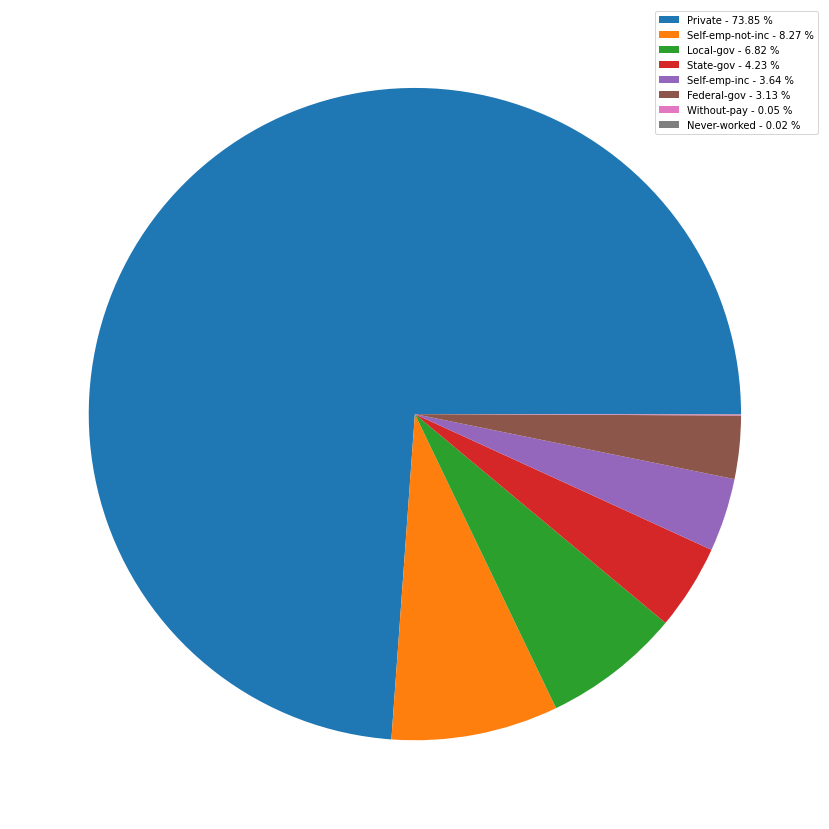

In [ ]:
x,y = zip(*((df["workclass"].value_counts()).items()))
percent = list(map(lambda x : 100 * x / sum(list(y)),y))
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x,percent) ]
fig = plt.figure(figsize=(15,15))
patches, texts = plt.pie(y)
plt.legend(patches,labels)
plt.show()


In [ ]:
(df[:] == '?').sum()

age                 0
workclass           0
fnlwgt              0
education           0
education.num       0
marital.status      0
occupation          7
relationship        0
race                0
sex                 0
capital.gain        0
capital.loss        0
hours.per.week      0
native.country    555
income              0
dtype: int64

In [ ]:
df.drop(df[df["occupation"]=='?'].index,inplace = True)

In [ ]:
df.shape

(30694, 15)

In [ ]:
(df[:] == '?').sum()

age                 0
workclass           0
fnlwgt              0
education           0
education.num       0
marital.status      0
occupation          0
relationship        0
race                0
sex                 0
capital.gain        0
capital.loss        0
hours.per.week      0
native.country    555
income              0
dtype: int64

In [ ]:
df.drop(df[df["native.country"]=='?'].index,inplace = True)

In [ ]:
(df[:] == '?').sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

### We have dropped all rows with missing values from our dataset.

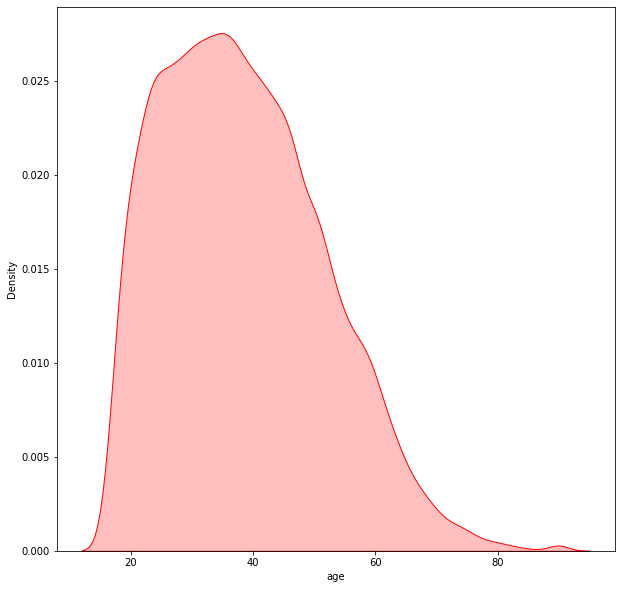

In [ ]:
age_pop= df["age"]

fig = plt.figure(figsize=(10,10))
sns.kdeplot(data=age_pop,shade =True, color = "r")

plt.show()

In [ ]:
df.shape

(30139, 15)

In [ ]:
df_country_inc = df[["native.country","income"]]

In [ ]:
df_country_inc.head()

,native.country,income
1,United-States,<=50K
3,United-States,<=50K
4,United-States,<=50K
5,United-States,<=50K
6,United-States,<=50K


In [ ]:
df_country_inc.iloc[0]["native.country"]

'United-States'

In [ ]:
for i in range(df_country_inc.shape[0]):
  if df_country_inc.iloc[i]["native.country"] == "United-States":
    df_country_inc.iloc[i]["native.country"] = "American"
  else:
    df_country_inc.iloc[i]["native.country"] = "Immigrant"

In [ ]:
df_country_inc_dumm = pd.get_dummies(df_country_inc)

In [ ]:
df_country_inc_dumm.head()

,native.country_American,native.country_Immigrant,income_<=50K,income_>50K
1,1,0,1,0
3,1,0,1,0
4,1,0,1,0
5,1,0,1,0
6,1,0,1,0


Correlation Matrix:
                           native.country_American  native.country_Immigrant  \
native.country_American                   1.00000                  -1.00000   
native.country_Immigrant                 -1.00000                   1.00000   
income_<=50K                             -0.03994                   0.03994   
income_>50K                               0.03994                  -0.03994   

                          income_<=50K  income_>50K  
native.country_American       -0.03994      0.03994  
native.country_Immigrant       0.03994     -0.03994  
income_<=50K                   1.00000     -1.00000  
income_>50K                   -1.00000      1.00000  


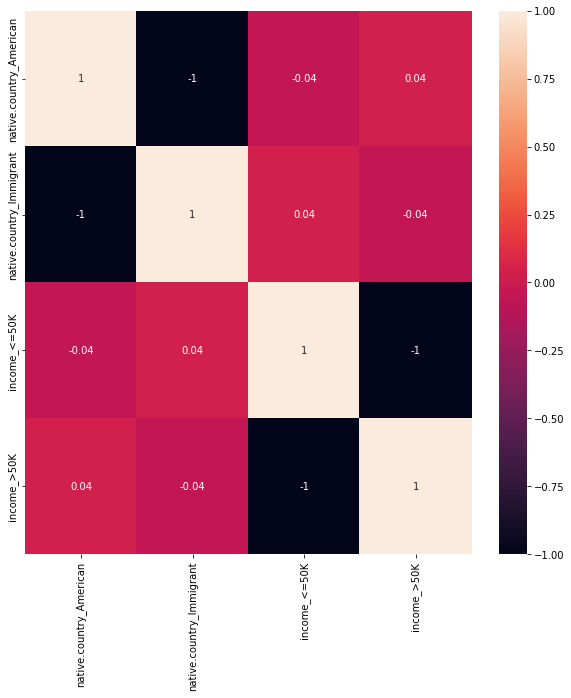

In [ ]:
import seaborn as sns
corr_mat = df_country_inc_dumm .corr()
print('Correlation Matrix:\n', corr_mat)


fig = plt.figure(figsize=(10, 10))
ax = sns.heatmap(data=corr_mat, annot=True)
plt.show()

### Being American or an Immigrant dont have disparities in income in the dataset

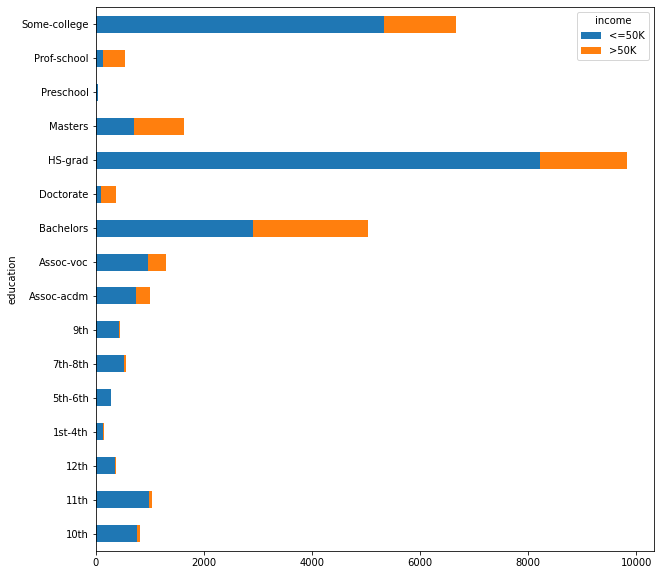

In [ ]:
educ_income = df.groupby(['education','income']).size().unstack() # take sex vs survived dataframe
#norm_sex_survive =sex_survive.apply(lambda x:x/x.sum(), axis=1)# apply normalization of dataframe rowwise
educ_income.plot(kind='barh', stacked=True, legend=True,figsize = (10,10)) # plot stacked bar histogram

In [ ]:
#(df.groupby(['education.num','income']).size().unstack())


In [ ]:
df.drop("education",axis =1,inplace =True)

In [ ]:
df["workclass"].value_counts()

Private             22264
Self-emp-not-inc     2498
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: workclass, dtype: int64

In [ ]:
df[df["marital.status"]=="Separated"]["relationship"].value_counts()

Unmarried         413
Not-in-family     383
Own-child          90
Other-relative     53
Name: relationship, dtype: int64

In [ ]:
df["marital.status"].value_counts()

Married-civ-spouse       14059
Never-married             9711
Divorced                  4212
Separated                  939
Widowed                    827
Married-spouse-absent      370
Married-AF-spouse           21
Name: marital.status, dtype: int64

In [ ]:
df[df["relationship"]=="Wife"]["sex"].value_counts()

Female    1405
Male         1
Name: sex, dtype: int64

In [ ]:
#df.drop("relationship",axis =1,inplace = True ) #relationship is correlated with marital status
df.drop("marital.status",axis =1,inplace = True ) 

In [ ]:
df.drop("native.country",axis =1,inplace = True ) #we did not observe significant correlation between income and native country

In [ ]:
df_dummies = pd.get_dummies(df ) # create dummies with droping first column to avoid correlation

In [ ]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30139 entries, 1 to 32560
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   age                           30139 non-null  int64
 1   fnlwgt                        30139 non-null  int64
 2   education.num                 30139 non-null  int64
 3   capital.gain                  30139 non-null  int64
 4   capital.loss                  30139 non-null  int64
 5   hours.per.week                30139 non-null  int64
 6   workclass_Federal-gov         30139 non-null  uint8
 7   workclass_Local-gov           30139 non-null  uint8
 8   workclass_Private             30139 non-null  uint8
 9   workclass_Self-emp-inc        30139 non-null  uint8
 10  workclass_Self-emp-not-inc    30139 non-null  uint8
 11  workclass_State-gov           30139 non-null  uint8
 12  workclass_Without-pay         30139 non-null  uint8
 13  occupation_Adm-clerical       3

In [ ]:
for col in [0,1,2,3,4,5]: # normalizing the dataset
  min = df_dummies.iloc[:,col].min()
  max = df_dummies.iloc[:,col].max()
  print(col)
  for row in range(df_dummies.shape[0]):
    df_dummies.iloc[row,col] = (df_dummies.iloc[row,col]-min)/(max-min)

0
1
2
3
4
5


In [ ]:
df_dummies.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Female,sex_Male,income_<=50K,income_>50K
1,0.890411,0.080970,0.533333,0.0,1.000000,0.173469,0,0,1,0,...,0,0,0,0,0,1,1,0,1,0
3,0.506849,0.086061,0.200000,0.0,0.895317,0.397959,0,0,1,0,...,0,0,0,0,0,1,1,0,1,0
4,0.328767,0.170568,0.600000,0.0,0.895317,0.397959,0,0,1,0,...,0,0,0,0,0,1,1,0,1,0
5,0.232877,0.138072,0.533333,0.0,0.865473,0.448980,0,0,1,0,...,0,0,0,0,0,1,1,0,1,0
6,0.287671,0.093024,0.333333,0.0,0.865473,0.397959,0,0,1,0,...,0,0,0,0,0,1,0,1,1,0


In [ ]:
df_dummies.drop("fnlwgt",axis =1 , inplace = True)

In [ ]:
X = df_dummies.iloc[:,0:-2]
Y = df_dummies.iloc[:,-1:]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
type(X_train)

pandas.core.frame.DataFrame

In [ ]:
(y_train)[0:4]

,income_>50K
2433,1
4782,0
5873,0
29472,1


In [ ]:
def build_model(hp):
  model = Sequential()
  
        
  
  model.add(Dense(
      hp.Int("units_input", min_value = 1024,max_value = 2048, step = 32),
      activation='relu',input_dim=39))
  
  if hp.Boolean("dropout1"):
      model.add(Dropout(rate=0.2))
  
  model.add(Dense(
      hp.Int("units_2", min_value = 512,max_value = 1024, step = 32),
      activation='relu'))
  
  if hp.Boolean("dropout2"):
      model.add(Dropout(rate=0.1))

  model.add(Dense(
      hp.Int('units_3', min_value = 128,max_value = 512, step = 32),
      activation='relu'))
  
  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer=Adam(hp.Choice('learning_rate', values = [1e-2,1e-3,1e-4])), loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
!pip install -U keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 133 kB 8.1 MB/s 


In [ ]:
from kerastuner.tuners import RandomSearch,BayesianOptimization

# tuner = RandomSearch(
#     build_model,
#     objective='val_accuracy',
#     max_trials=10,
#     executions_per_trial=3,
#     directory = 'income_model8',
#     project_name = 'income'
#     )

bay_tuner = BayesianOptimization(
    build_model,
    objective='val_accuracy',
    max_trials=50,
    executions_per_trial=3,
    directory = 'income_model10',
    project_name = 'income'
  )


bay_tuner.search(X_train,y_train,epochs = 10 , validation_data=(X_test, (y_test)),batch_size=128)


Trial 50 Complete [00h 00m 28s]
val_accuracy: 0.8566135764122009

Best val_accuracy So Far: 0.8571665485699972
Total elapsed time: 00h 28m 16s
INFO:tensorflow:Oracle triggered exit


In [ ]:
checkpoint_filepath = '/tmp/checkpoint2'
check_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
#tune_model = tuner.get_best_models(num_models=1)[0]

In [ ]:
bay_tune_model = bay_tuner.get_best_models(num_models=1)[0]
bay_tune_model.summary()
bay_hist = bay_tune_model.fit(X_train, (y_train), validation_data=(X_test, (y_test)),callbacks=[check_callback],epochs=50,initial_epoch = 15, batch_size=128)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1408)              56320     
                                                                 
 dropout (Dropout)           (None, 1408)              0         
                                                                 
 dense_1 (Dense)             (None, 704)               991936    
                                                                 
 dropout_1 (Dropout)         (None, 704)               0         
                                                                 
 dense_2 (Dense)             (None, 224)               157920    
                                                                 
 dense_3 (Dense)             (None, 1)                 225       
                                                                 
Total params: 1,206,401
Trainable params: 1,206,401
Non-

In [ ]:
best_bay_tune_model = tf.keras.models.load_model('/tmp/checkpoint2')
loss, accuracy = best_bay_tune_model.evaluate(X_test, (y_test))
print('\n\n Loss', loss, 'Accuracy:', accuracy)

189/189 [==============================] - 1s 2ms/step - loss: 0.3655 - accuracy: 0.8575


 Loss 0.3654627501964569 Accuracy: 0.8574983477592468


##Final Testing accuracy is 85.75

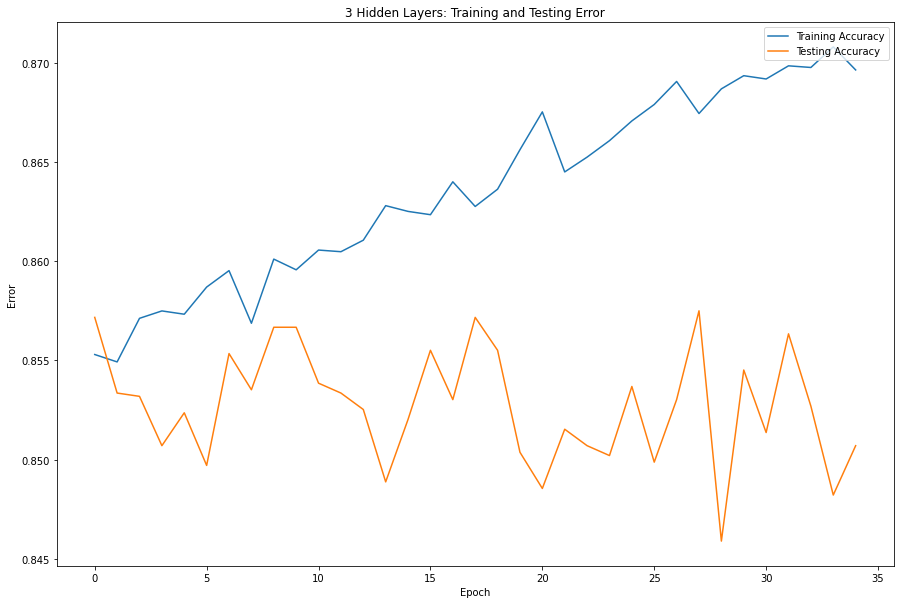

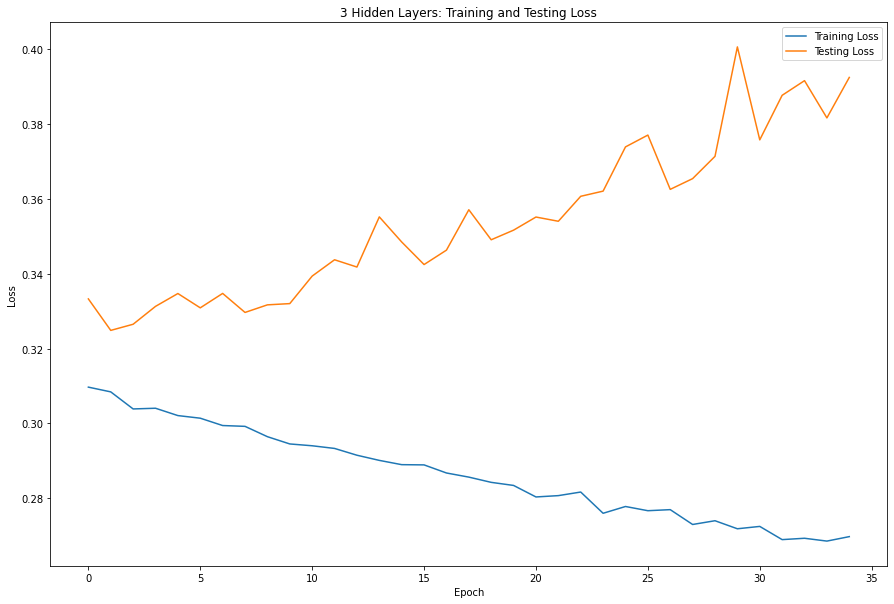

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(bay_hist.history['accuracy'])
plt.plot(bay_hist.history['val_accuracy'])
plt.title('3 Hidden Layers: Training and Testing Error')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Testing Accuracy'], loc='upper right')
plt.show()

# Loss
plt.figure(figsize=(15, 10))
plt.plot(bay_hist.history['loss'])
plt.plot(bay_hist.history['val_loss'])
plt.title('3 Hidden Layers: Training and Testing Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Testing Loss'], loc='upper right')
plt.show()